In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading all the data files.
bill_of_materials_df = pd.read_csv('C:/Users/user/Desktop/competition_data/bill_of_materials.csv')
comp_adaptor_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_adaptor.csv')
comp_boss_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_boss.csv')
comp_elbow_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_elbow.csv')
comp_float_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_float.csv')
comp_hfl_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_hfl.csv')
comp_nut_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_nut.csv')
comp_other_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_other.csv')
comp_sleeve_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_sleeve.csv')
comp_straight_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_straight.csv')
comp_tee_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_tee.csv')
comp_threaded_df = pd.read_csv('C:/Users/user/Desktop/competition_data/comp_threaded.csv')
components_df = pd.read_csv('C:/Users/user/Desktop/competition_data/components.csv')
specs_df = pd.read_csv('C:/Users/user/Desktop/competition_data/specs.csv')
test_set_df = pd.read_csv('C:/Users/user/Desktop/competition_data/test_set.csv')
train_set_df = pd.read_csv('C:/Users/user/Desktop/competition_data/train_set.csv')
tube_end_form_df = pd.read_csv('C:/Users/user/Desktop/competition_data/tube_end_form.csv')
tube_df = pd.read_csv('C:/Users/user/Desktop/competition_data/tube.csv')
type_component_df = pd.read_csv('C:/Users/user/Desktop/competition_data/type_component.csv')
type_connection_df = pd.read_csv('C:/Users/user/Desktop/competition_data/type_connection.csv')
type_end_form_df = pd.read_csv('C:/Users/user/Desktop/competition_data/type_end_form.csv')

In [5]:
#Lets do analysis of train set data frame.
#Change some of the columns of train set to categorical.
train_set_df['tube_assembly_id'] = pd.Series(train_set_df['tube_assembly_id'], dtype = 'category')
train_set_df['supplier'] = pd.Series(train_set_df['supplier'], dtype = 'category')
train_set_df['bracket_pricing'] = pd.Series(train_set_df['bracket_pricing'], dtype = 'category')

In [9]:
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30213 entries, 0 to 30212
Data columns (total 8 columns):
tube_assembly_id      30213 non-null category
supplier              30213 non-null category
quote_date            30213 non-null int64
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null category
quantity              30213 non-null int64
cost                  30213 non-null float64
dtypes: category(3), float64(1), int64(4)
memory usage: 1.7 MB


In [7]:
#Now lets convert our quote_date coloumn to datetime type and make it as day in the reference to the first date in the quote date.
df = pd.to_datetime(train_set_df['quote_date'])
df = df.to_frame()
df['first_date'] = pd.Timestamp('19820922')
train_set_df['quote_date'] = (df['quote_date'] - df['first_date']).dt.days

In [8]:
train_set_df.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,11246,0,0,Yes,1,21.905933
1,TA-00002,S-0066,11246,0,0,Yes,2,12.341214
2,TA-00002,S-0066,11246,0,0,Yes,5,6.601826
3,TA-00002,S-0066,11246,0,0,Yes,10,4.687770
4,TA-00002,S-0066,11246,0,0,Yes,25,3.541561


In [175]:
train_set_df.describe(include = 'all')

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
count,30213,30213,30213.000000,30213.000000,30213.000000,30213,30213.000000,30213.000000
unique,8855,57,NaN,NaN,NaN,2,NaN,NaN
top,TA-04788,S-0066,NaN,NaN,NaN,Yes,NaN,NaN
freq,14,20553,NaN,NaN,NaN,26283,NaN,NaN
mean,NaN,NaN,10910.054050,120.369377,2.084699,NaN,38.389369,13.433317
std,NaN,NaN,978.369464,1590.331872,12.742776,NaN,70.761392,28.663200
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.503553
25%,NaN,NaN,10991.000000,0.000000,0.000000,NaN,2.000000,3.878190
50%,NaN,NaN,11240.000000,0.000000,0.000000,NaN,10.000000,6.521146
75%,NaN,NaN,11302.000000,2.000000,0.000000,NaN,40.000000,13.431781


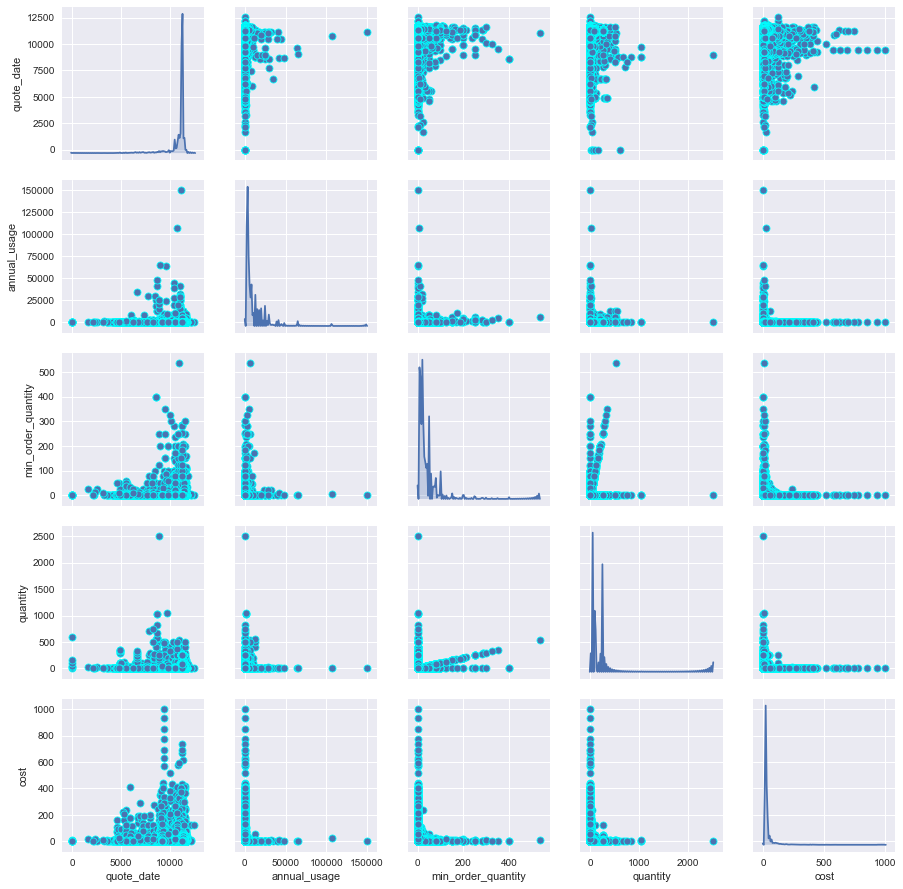

In [202]:
sns.pairplot(train_set_df, markers= 'o',diag_kind="kde",diag_kws=dict(shade=True),  
              plot_kws=dict(s=50, edgecolor="cyan", linewidth=0.8))

In [129]:
tube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 16 columns):
tube_assembly_id    21198 non-null category
material_id         20919 non-null category
diameter            21198 non-null float64
wall                21198 non-null float64
length              21198 non-null float64
num_bends           21198 non-null int64
bend_radius         21190 non-null float64
end_a_1x            21198 non-null category
end_a_2x            21198 non-null category
end_x_1x            21198 non-null category
end_x_2x            21198 non-null category
end_a               21198 non-null category
end_x               21198 non-null category
num_boss            21198 non-null int64
num_bracket         21198 non-null int64
other               21198 non-null int64
dtypes: category(8), float64(4), int64(4)
memory usage: 2.3 MB


In [14]:
#Now lets fix the tube data frame. 
#By making some coloumns as catagorical.
tube_df['tube_assembly_id'] = pd.Series(tube_df['tube_assembly_id'], dtype = 'category')
tube_df['material_id'] = pd.Series(tube_df['material_id'], dtype = 'category')
tube_df['end_a_1x'] = pd.Series(tube_df['end_a_1x'], dtype = 'category')
tube_df['end_a_2x'] = pd.Series(tube_df['end_a_2x'], dtype = 'category')
tube_df['end_x_1x'] = pd.Series(tube_df['end_x_1x'], dtype = 'category')
tube_df['end_x_2x'] = pd.Series(tube_df['end_x_2x'], dtype = 'category')
tube_df['end_a'] = pd.Series(tube_df['end_a'], dtype = 'category')
tube_df['end_x'] = pd.Series(tube_df['end_x'], dtype = 'category')


In [38]:
tube_df.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21190.00000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,45.59441,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,34.98761,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.05000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.10000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.80000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,565.00000,5.000000,5.000000,8.000000


In [91]:
#Lets explore the numerical columns of the tube data frame
#Diameter
diameter = tube_df['diameter']

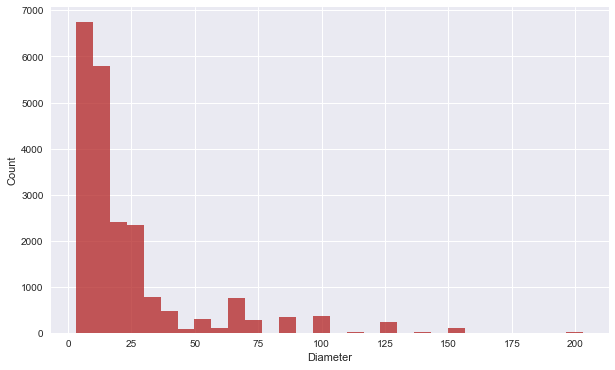

In [201]:
diameter.hist(bins = 30, figsize=(10,6), color = 'firebrick', alpha = 0.75)
plt.xlabel('Diameter')
plt.ylabel('Count')
#Maximun number of diameters of the tube is between 0-30

In [107]:
#Wall 
wall = tube_df['wall']

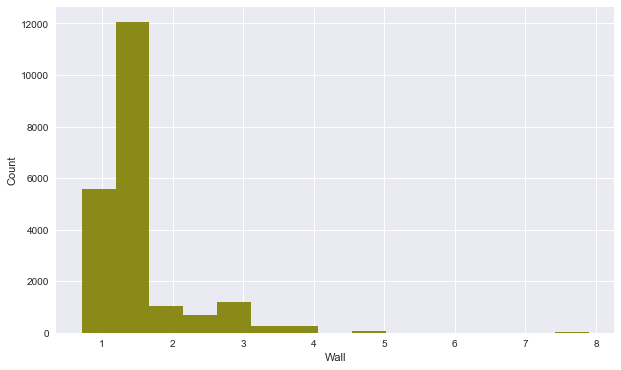

In [200]:
wall.hist(figsize=(10,6), bins = 15, color = 'olive', alpha = 0.90)
plt.xlabel('Wall')
plt.ylabel('Count')
#Maximum off the wall sizes are between 0.5-1.5

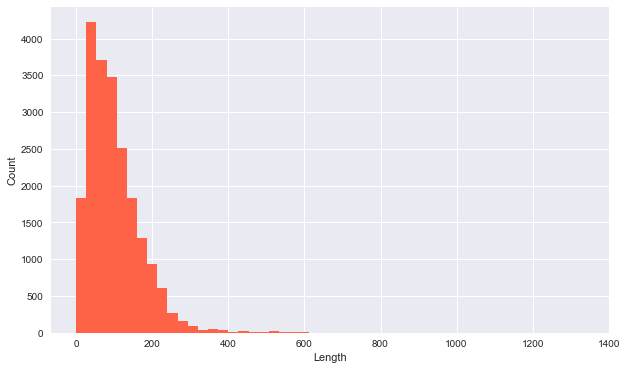

In [199]:
#Length
tube_df['length'].hist(figsize = (10,6), bins = 50, color='tomato')
plt.xlabel('Length')
plt.ylabel('Count')
#Here we see that shorter tubes less than 250 are dominant.

In [119]:
tube_df.describe(include = 'all')
# num_boss, num_bracket, and other are mostly 0, with small maximun values.

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
count,21198,20919,21198.000000,21198.000000,21198.000000,21198.000000,21190.00000,21198,21198,21198,21198,21198,21198,21198.000000,21198.000000,21198.000000
unique,21198,19,NaN,NaN,NaN,NaN,NaN,2,2,2,2,25,27,NaN,NaN,NaN
top,TA-21199,SP-0029,NaN,NaN,NaN,NaN,NaN,N,N,N,N,EF-003,EF-003,NaN,NaN,NaN
freq,1,11488,NaN,NaN,NaN,NaN,NaN,20118,18015,20377,18493,11388,10863,NaN,NaN,NaN
mean,NaN,NaN,23.687764,1.578402,100.312844,3.748137,45.59441,NaN,NaN,NaN,NaN,NaN,NaN,0.044485,0.006746,0.022644
std,NaN,NaN,25.396277,0.745749,70.542771,2.265405,34.98761,NaN,NaN,NaN,NaN,NaN,NaN,0.260737,0.100015,0.199676
min,NaN,NaN,3.180000,0.710000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,9.520000,0.890000,48.000000,2.000000,19.05000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,15.880000,1.650000,86.000000,3.000000,38.10000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,NaN,NaN,25.400000,1.650000,135.000000,5.000000,50.80000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


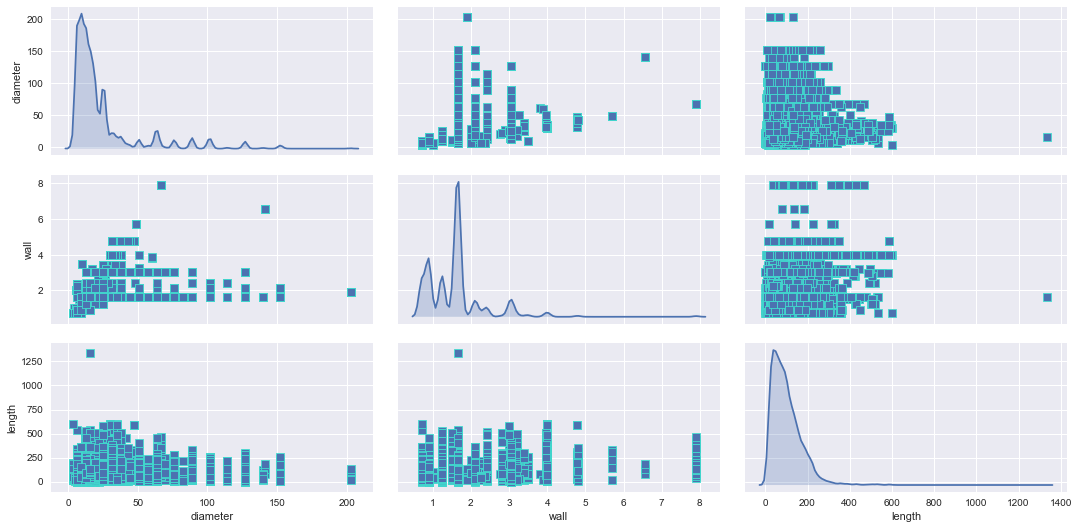

In [206]:
#Lets see the pairplot between these three components(diameter,length,wall)
sns.pairplot(tube_df[['diameter', 'wall', 'length']], aspect = 2, markers= 's',diag_kind="kde", 
             diag_kws=dict(shade=True),  plot_kws=dict(s=50, edgecolor="turquoise", linewidth=0.8))

In [131]:
tube_df.corr()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
diameter,1.000000,0.277593,0.046197,-0.305176,0.692576,0.320630,0.053283,0.091146
wall,0.277593,1.000000,0.205426,-0.077138,0.348386,0.056984,0.015938,0.035172
length,0.046197,0.205426,1.000000,0.469116,0.152259,0.048495,-0.003963,-0.001253
num_bends,-0.305176,-0.077138,0.469116,1.000000,-0.178037,-0.063295,-0.039557,-0.029422
bend_radius,0.692576,0.348386,0.152259,-0.178037,1.000000,0.249845,0.085922,0.066708
num_boss,0.320630,0.056984,0.048495,-0.063295,0.249845,1.000000,0.021055,0.068547
num_bracket,0.053283,0.015938,-0.003963,-0.039557,0.085922,0.021055,1.000000,0.077393
other,0.091146,0.035172,-0.001253,-0.029422,0.066708,0.068547,0.077393,1.000000


In [90]:
#Now lets analyze the bill of materials dataframe.
bill_of_materials_df.head(10)

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TA-00006,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TA-00007,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TA-00008,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TA-00009,C-1625,2.0,C-1632,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TA-00010,C-1768,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
bill_of_materials_df.describe()

,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
count,19149.000000,14786.000000,4798.000000,608.000000,92.000000,26.000000,7.0,1.0
mean,1.559873,1.526106,1.020634,1.027961,1.032609,1.153846,1.0,1.0
std,0.507444,0.510851,0.160100,0.209041,0.178583,0.367946,0.0,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
max,6.000000,6.000000,4.000000,4.000000,2.000000,2.000000,1.0,1.0


In [46]:
#Seperating the quantity and component of tubes and analysing both.

bill_comp_types_df = bill_of_materials_df.iloc[:,[1,3,5,7,9,11,13,15]]

In [48]:
bill_comp_types_logical_df = ~bill_comp_types_df.isnull()

In [50]:
component_series = bill_comp_types_logical_df.sum(axis = 1)

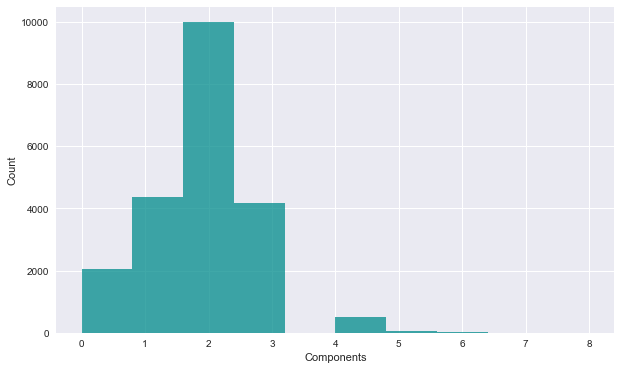

In [194]:
component_series.hist(figsize=(10,6), color = 'darkcyan',alpha=0.75)
plt.xlabel('Components')
plt.ylabel('Count')
#Here we see that most of the components are allign on the 2 types.

In [76]:
(sum(component_series == 0) + sum(component_series == 1) + sum(component_series == 2) \
 + sum(component_series == 3))/float(component_series.count())
#Here we see that almost 97% of tube have components in range 0-3 

0.971365223134258

In [80]:
#Now lets check same for the 
bill_comp_quants_df = bill_of_materials_df.iloc[:, [2,4,6,8,10,12,14,16]]

In [81]:
quants_series = bill_comp_quants_df.sum(axis = 1)

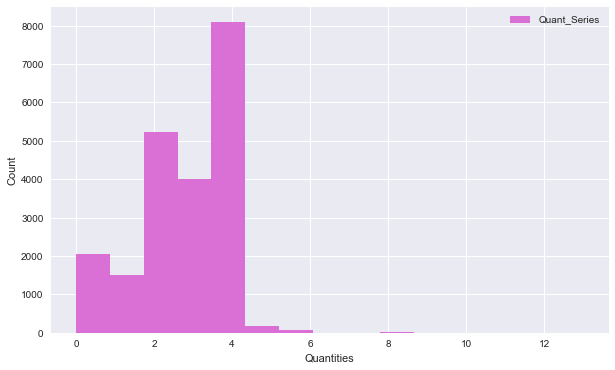

In [193]:
quants_series.hist(bins = 15, figsize=(10,6), color = 'orchid', alpha =1, label= 'Quant_Series')
plt.xlabel('Quantities')
plt.ylabel('Count')
plt.legend()

In [83]:
(sum(quants_series == 0) + sum(quants_series == 1) + sum(quants_series == 2) \
 + sum(quants_series == 3) + sum(quants_series == 4)) / float(np.shape(bill_of_materials_df)[0])
#98% of all tube assemblies have 0-4 total components

0.9856590244362676

In [160]:
#Now lets analyze the specification dataframe.
#specs_df.describe(include='all')
specs_df.head()


,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
specs_only_df = specs_df.iloc[:, 1:11]

In [162]:
specs_logical_df = ~specs_only_df.isnull()
spec_totals = specs_logical_df.sum(axis = 1)

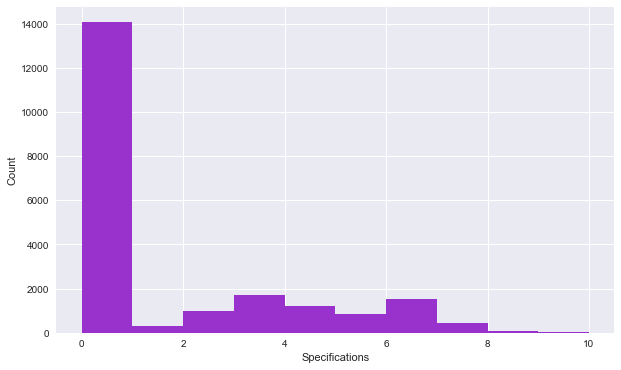

In [190]:
spec_totals.hist(figsize=(10,6), color = "darkorchid", bins = 10) 
plt.xlabel('Specifications')
plt.ylabel('Count')
plt.legend()
#Almost half of all tube assemblies have exactly 2 types of components

In [207]:
#Now lets join our data frames into a single dataframe.
#1st Applying Left join on train set dataframe and tube dataframe on tube_assembly_id.
join_1 = pd.merge(train_set_df, tube_df, left_on = 'tube_assembly_id', right_on = 'tube_assembly_id',
                    how='left', sort=False)

In [213]:
join_1.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00002,S-0066,11246,0,0,Yes,1,21.905933,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,TA-00002,S-0066,11246,0,0,Yes,2,12.341214,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00002,S-0066,11246,0,0,Yes,5,6.601826,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00002,S-0066,11246,0,0,Yes,10,4.687770,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00002,S-0066,11246,0,0,Yes,25,3.541561,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0


In [209]:
#2nd Applying Left join on join_1 dataframe(train_set_df and tube_df) and specification dataframe(specs_totals). 
specs_with_totals_df = specs_df.copy()
specs_with_totals_df['spec_totals'] = spec_totals

join_2 = join_1.merge(specs_with_totals_df[['tube_assembly_id', 'spec_totals']])

In [214]:
join_2.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec_totals
0,TA-00002,S-0066,11246,0,0,Yes,1,21.905933,SP-0019,6.35,...,N,N,N,N,EF-008,EF-008,0,0,0,0
1,TA-00002,S-0066,11246,0,0,Yes,2,12.341214,SP-0019,6.35,...,N,N,N,N,EF-008,EF-008,0,0,0,0
2,TA-00002,S-0066,11246,0,0,Yes,5,6.601826,SP-0019,6.35,...,N,N,N,N,EF-008,EF-008,0,0,0,0
3,TA-00002,S-0066,11246,0,0,Yes,10,4.687770,SP-0019,6.35,...,N,N,N,N,EF-008,EF-008,0,0,0,0
4,TA-00002,S-0066,11246,0,0,Yes,25,3.541561,SP-0019,6.35,...,N,N,N,N,EF-008,EF-008,0,0,0,0


In [215]:
#3rd Applying left join with join_2(train, tube, and spec_totals) with bill_of_materials_summary_df
bill_of_materials_summary_df = bill_of_materials_df.copy()
bill_of_materials_summary_df['type_totals'] = component_series
bill_of_materials_summary_df['component_totals'] = quants_series

join_3 = join_2.merge(bill_of_materials_summary_df[['tube_assembly_id', 'type_totals', 'component_totals']])


In [222]:
join_3.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec_totals,type_totals,component_totals
0,TA-00002,S-0066,11246,0,0,1,1,21.905933,SP-0019,6.35,...,0,0,EF-008,EF-008,0,0,0,0,1,2.0
1,TA-00002,S-0066,11246,0,0,1,2,12.341214,SP-0019,6.35,...,0,0,EF-008,EF-008,0,0,0,0,1,2.0
2,TA-00002,S-0066,11246,0,0,1,5,6.601826,SP-0019,6.35,...,0,0,EF-008,EF-008,0,0,0,0,1,2.0
3,TA-00002,S-0066,11246,0,0,1,10,4.687770,SP-0019,6.35,...,0,0,EF-008,EF-008,0,0,0,0,1,2.0
4,TA-00002,S-0066,11246,0,0,1,25,3.541561,SP-0019,6.35,...,0,0,EF-008,EF-008,0,0,0,0,1,2.0


In [219]:
#Lets convert bracket_pricing in 0's and 1's for NO and YES respectively.
join_3['bracket_pricing'] = join_3['bracket_pricing'].replace(['No', 'Yes'], [0, 1])

In [221]:
#Now lets convert end_a_1x, end_a_2x, end_x_1x, end_x_2x columns to 0/1.
join_3['end_a_1x'] = join_3['end_a_1x'].replace(['N', 'Y'], [0, 1])
join_3['end_a_2x'] = join_3['end_a_2x'].replace(['N', 'Y'], [0, 1])
join_3['end_x_1x'] = join_3['end_x_1x'].replace(['N', 'Y'], [0, 1])
join_3['end_x_2x'] = join_3['end_x_2x'].replace(['N', 'Y'], [0, 1])

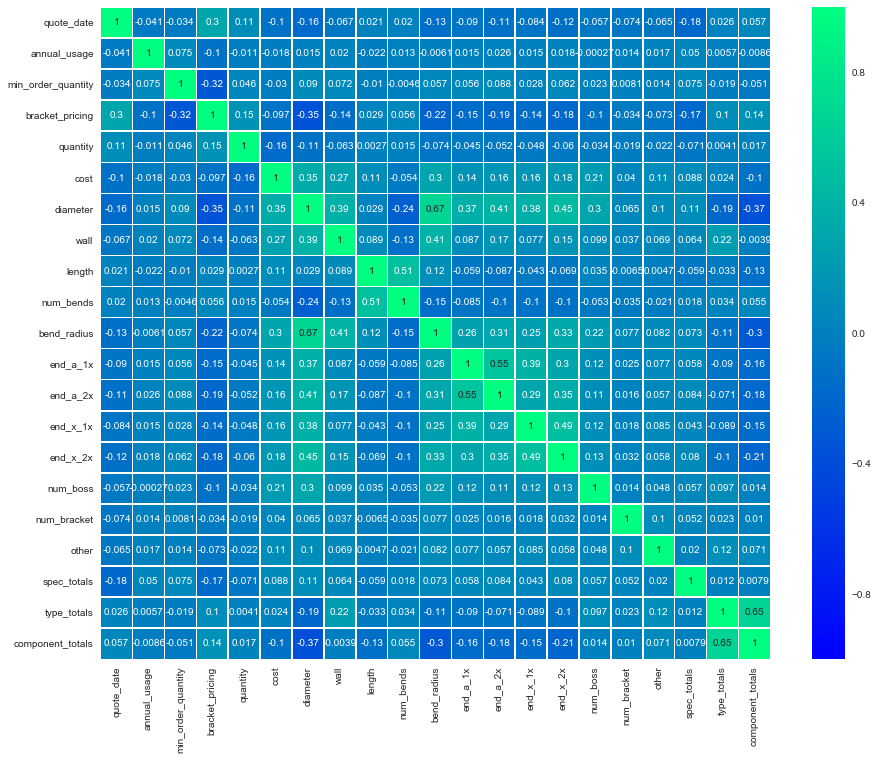

In [278]:
#Now lets make heatmaps and cluster maps of the correlations of the numerical colunms of join_3 data frame..
corr_df= join_3.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_df, vmax = 1, vmin = -1, annot=True,linewidths=.5, cmap = 'winter')

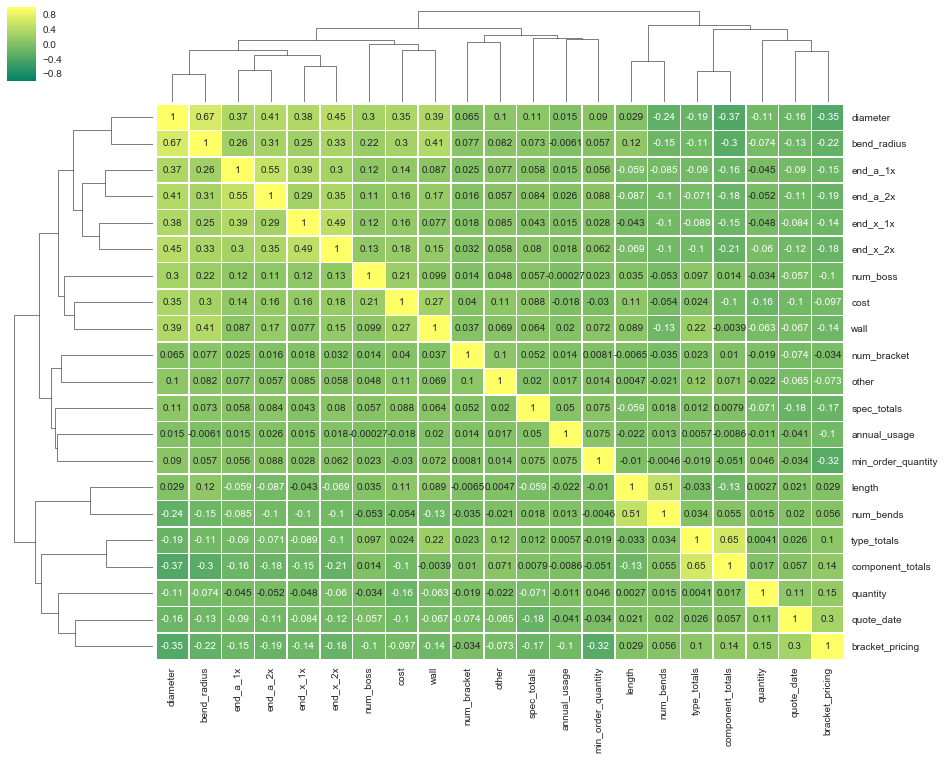

In [282]:
cm = sns.clustermap(corr_df, vmax = 1, vmin = -1, annot=True,linewidths=.5, cmap = 'summer', figsize=(15,12))
cm.ax_heatmap.set_yticklabels(cm.ax_heatmap.get_yticklabels(), rotation=0)

In [244]:
#Lets plot the more correlated columns
#join_3.columns
more_correlated = pd.DataFrame(join_3.iloc[:,[7,9,10, 11, 12,13, 14,15,16,17,24,25]])

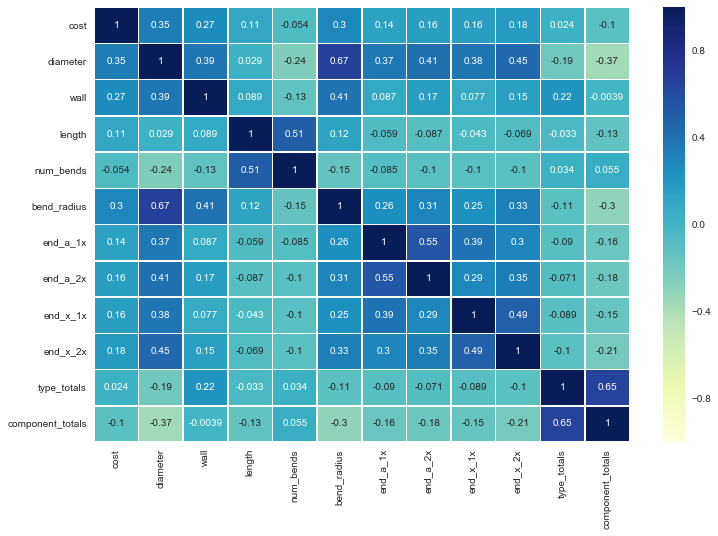

In [286]:
plt.figure(figsize=(12,8))
sns.heatmap(more_correlated.corr(), annot=True,  linewidths=.5, cmap = 'YlGnBu')

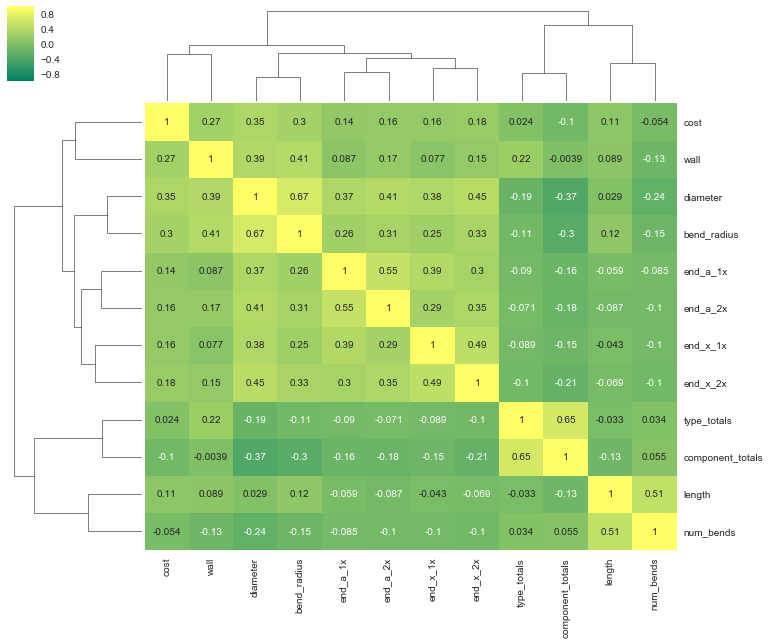

In [285]:
#cluster map on the more correlated columns
g = sns.clustermap(more_correlated.corr(), annot=True, cmap= 'summer', figsize=(12,10))
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)


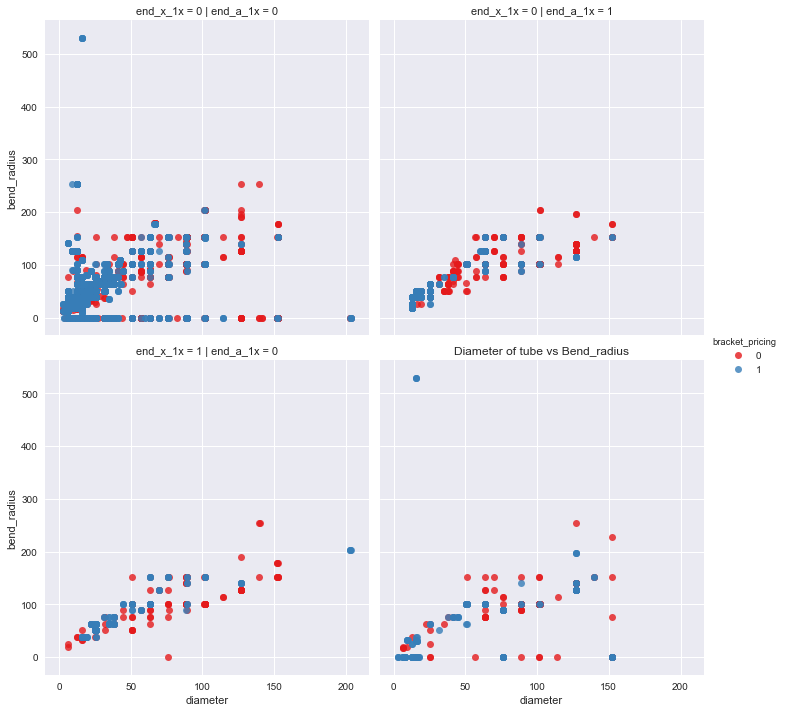

In [343]:
sns.lmplot(x= 'diameter', y='bend_radius', data=join_3, fit_reg=False,hue = 'bracket_pricing', palette='Set1', col='end_a_1x',
          row = 'end_x_1x', x_jitter=.2)
#plt.title('Diameter of tube vs Bend_radius')

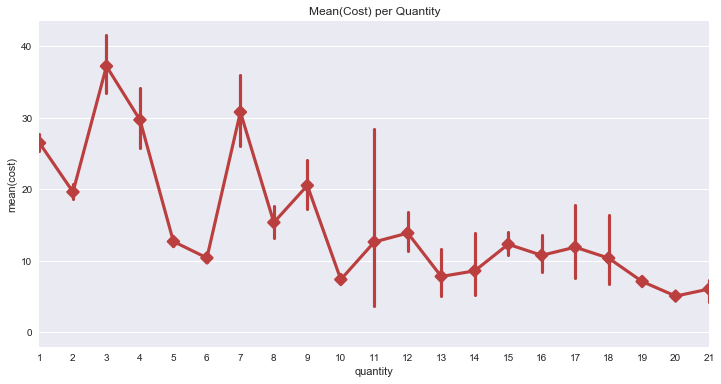

In [401]:
fig= plt.figure(figsize=(12,6))
sns.pointplot(x ='quantity', y = 'cost', data = join_3,color="#bb3f3f", markers="D")
plt.xlim((0,20))
plt.title('Mean(Cost) per Quantity')

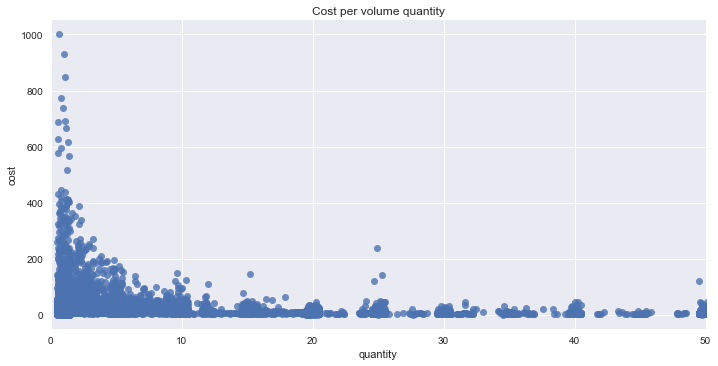

In [342]:
sns.lmplot(x = 'quantity', y = 'cost', data = join_3, aspect=2, fit_reg=False, markers='o',
          x_jitter=0.5)
plt.xlim((0,50))
plt.title('Cost per volume quantity')
#Most of the quantities are in the range of 1-5
#And as the quanitity is increasing the cost is decreasing.


In [365]:
supplier= pd.Series(join_3['supplier'], dtype='category')

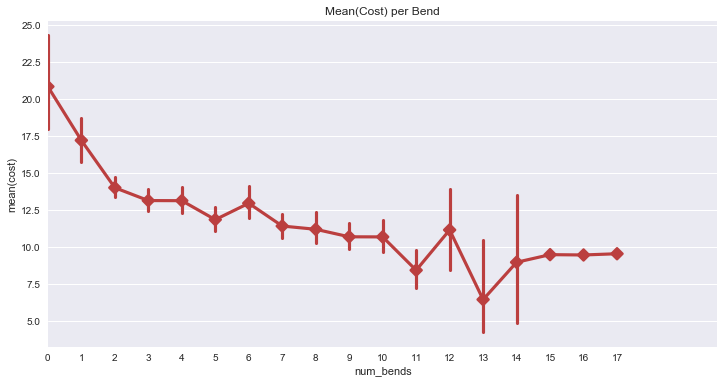

In [402]:
fig= plt.figure(figsize=(12,6))
sns.pointplot(x ='num_bends', y = 'cost', data = join_3,color="#bb3f3f", markers="D")
plt.xlim((0,20))
plt.title('Mean(Cost) per Bend')

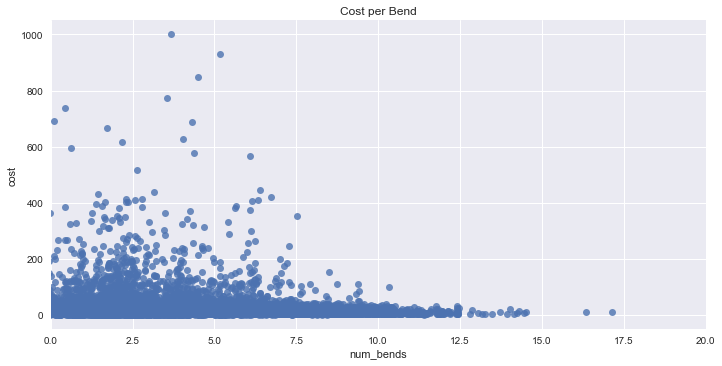

In [394]:
sns.lmplot(x = 'num_bends', y = 'cost', data = join_3, aspect=2, fit_reg=False, markers='o',
          x_jitter=0.50)
plt.xlim((0,20))
plt.title('Cost per Bend')